Python and sklearn version used for this notebook

In [1]:
import sys

# Print the version of Python
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
import sklearn

# Print the version of scikit-learn
sklearn_version = sklearn.__version__
sklearn_version


'1.2.2'

In [3]:
assert sys.version_info >= (3, 11) 

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.2.2")

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Creating a dataset using make_blobs

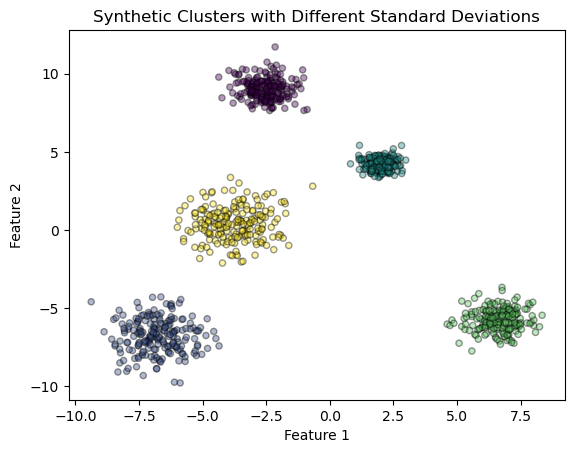

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with make_blobs
X, y = make_blobs(
    n_samples=1000, 
    centers=5, 
    n_features=4, 
    cluster_std=[0.7, 1.0, 0.4, 0.7, 1.0],  # Different standard deviations for each cluster
    random_state=42
)

# Visualize the generated clusters
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, alpha=0.4)
plt.title('Synthetic Clusters with Different Standard Deviations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('clusters.png', dpi=300)
plt.show()


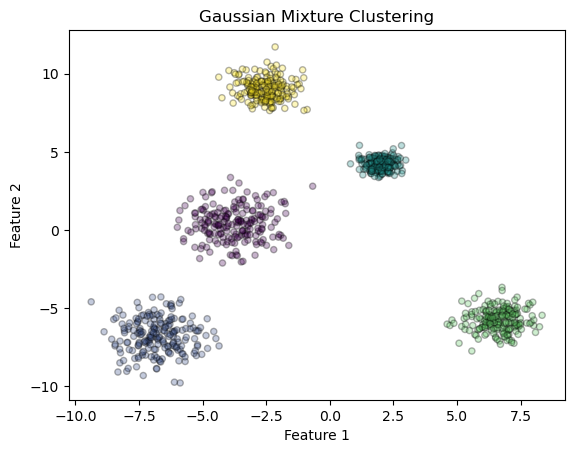

In [6]:
# Gaussian Mixture Model

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=20, alpha=.3)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('Gaussian Mixture Clustering.png', dpi=300)
plt.show()


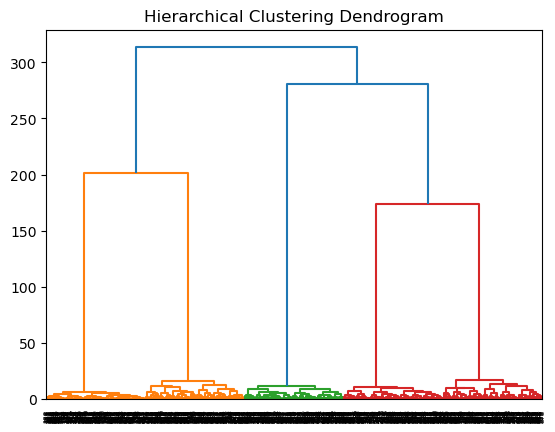

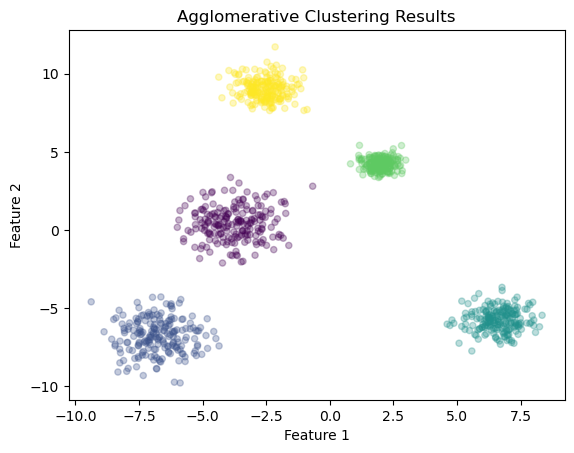

In [7]:
# Agglomerative Clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Fit the Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X)

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=20, alpha=.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering Results')
plt.savefig('Agglomerative.png', dpi=300)
plt.show()


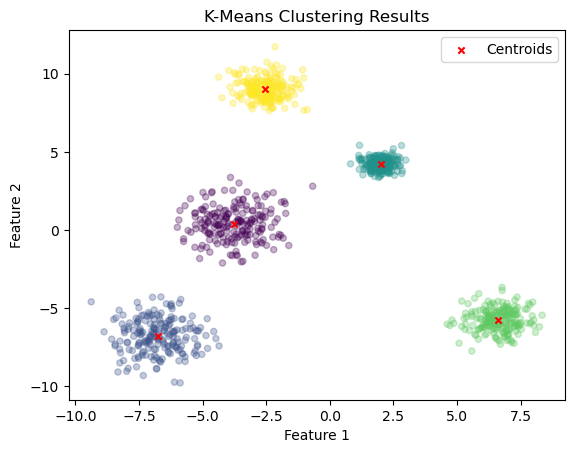

In [8]:
# K-Means Clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering
k_means = KMeans(n_clusters=5, random_state=42, n_init='auto')
k_means.fit(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_, cmap='viridis', s=20, alpha=.3)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=20, c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means Clustering Results')
plt.savefig('kmeans.png', dpi=300)
plt.show()


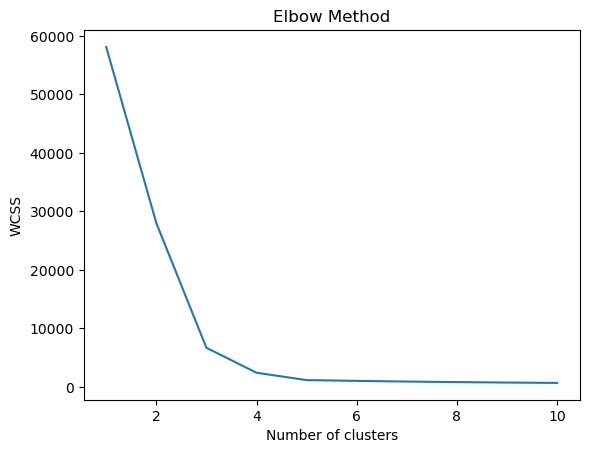

In [16]:
# The elbow method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example dataset
# Generate synthetic data with make_blobs
X, y = make_blobs(
    n_samples=1000, 
    centers=5, 
    n_features=2,
    cluster_std=[0.7, 1.0, 0.4, 0.7, 1],  # Different standard deviations for each cluster
    random_state=42
)

wcss = []
for i in range(1, 11):  # trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for each model

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()


For n_clusters = 2 the average silhouette_score is : 0.6104719594142752
For n_clusters = 3 the average silhouette_score is : 0.7281412339755425
For n_clusters = 4 the average silhouette_score is : 0.7749732690936251
For n_clusters = 5 the average silhouette_score is : 0.7286939542403489
For n_clusters = 6 the average silhouette_score is : 0.6616726780183116
For n_clusters = 7 the average silhouette_score is : 0.6420350016075017
For n_clusters = 8 the average silhouette_score is : 0.6438986259781332
For n_clusters = 9 the average silhouette_score is : 0.5477904966277551
For n_clusters = 10 the average silhouette_score is : 0.45689258731284543


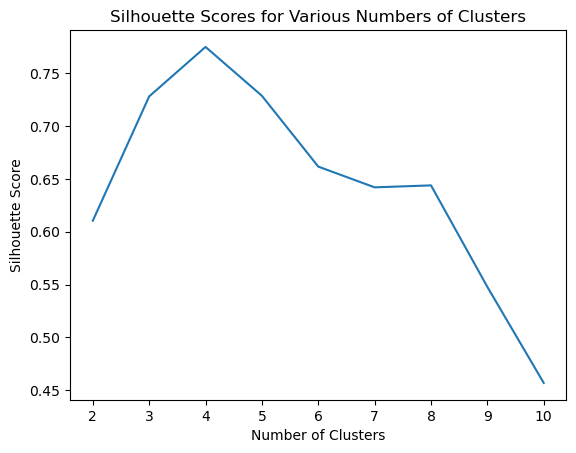

In [17]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# Trying different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "the average silhouette_score is :", silhouette_avg)

# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg_scores)
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.savefig('Silhouette Score.png', dpi=300)
plt.show()


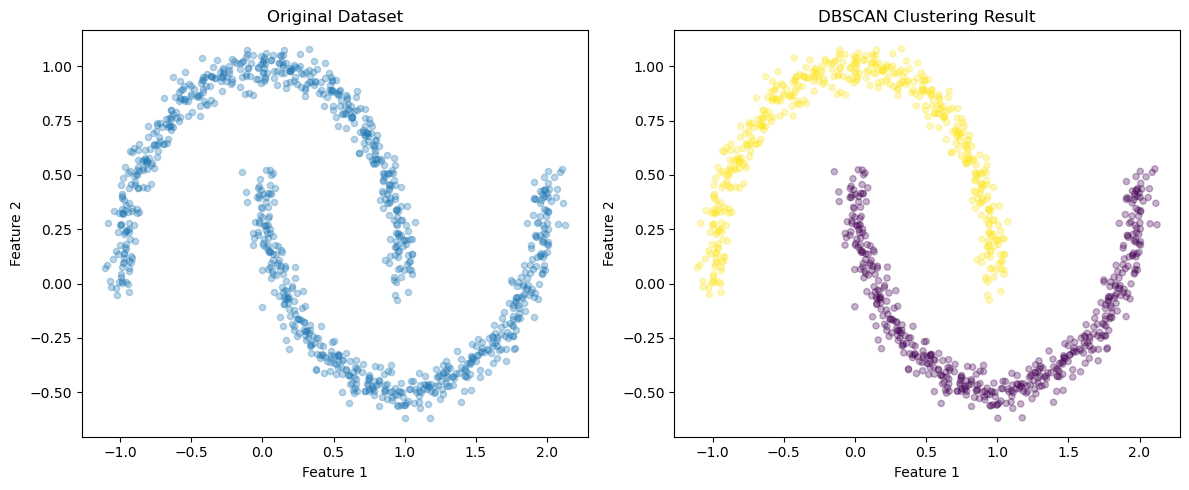

In [12]:
# DBSCAN

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with non-spherical shapes
X, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original dataset
axs[0].scatter(X[:, 0], X[:, 1], s=20, alpha=.3)
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot DBSCAN clustering result
axs[1].scatter(X[:, 0], X[:, 1], c=labels, s=20, alpha=.3)
axs[1].set_title('DBSCAN Clustering Result')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Layout adjustments
plt.tight_layout()

# Save the figure
plt.savefig('dbscan_clustering_results.png', dpi=300)
plt.show()

